# Clase 4: Regresion Lineal Multiple

La idea de regresion lineal multiple es conceptualmente igual a Regresion Lineal Simple, pero ahora la variable objetivo esta explicada por mas de una variable explicativa.

Cuando tengamos dos variables explicativas, podremos graficar la relacion de las variables en un plano.
Cuando tengamos +2 variables, no será posible graficarlo.

Para mas informacion, chequeamos el apunte enviado.

In [1]:
#Cargamos las librerias a usar
#Se incorpora pandas, una libreria para generar los dataset y manipularlos mejor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Data Acquisition / Obtencion de Datos

In [2]:
#cargamos boston y lo pasamos a panda
boston_dataset = datasets.load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
#veamos como es la forma del dataframe
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#indicamos cual sera la variable objetivo
#generamos los datos para las variables explicativas
boston['MEDV'] = boston_dataset.target
Y = boston['MEDV']
#Nuestras variables explicativas sera todas menos la resultado, la medv
X = boston.drop(columns="MEDV")

## Data Visualization / Visualizacion de datos

Primero veamos la distribucion del precio de las casas.
La interpretacion del grafico es: donde mas alta es la probability density, mas casas tiene un precio que ronda ese valor.

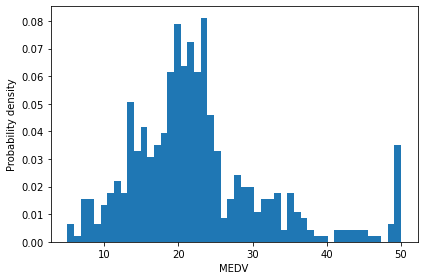

In [4]:
num_bins = 50
fig, ax = plt.subplots()
#Armamos el histograma
n, bins, patches = ax.hist(Y, num_bins, density=True)
#Seteamos el nombre de los ejes
ax.set_xlabel('MEDV')
ax.set_ylabel('Probability density')
#Mostramos
fig.tight_layout()
plt.show()

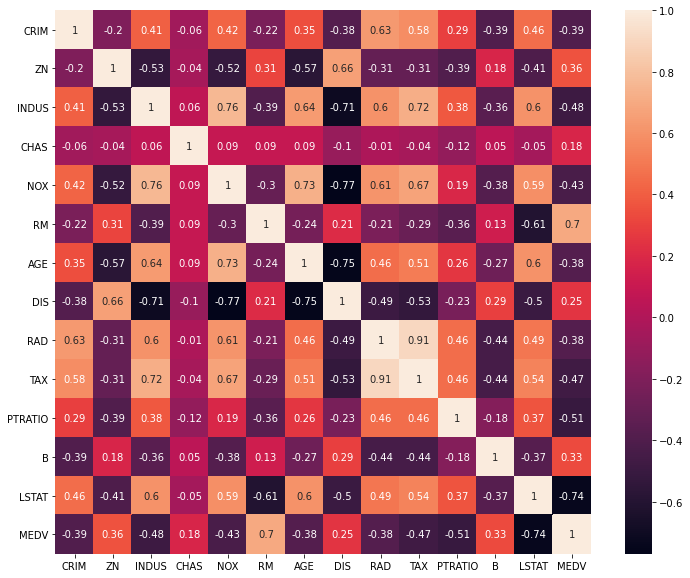

In [5]:
import seaborn as sns 
#Otra forma interesante de visualizar son las matrices de correlacion, es decir que tanto se relacionan dos
#varibles entre si
#La funcion corr() crea la matriz y round(2) fija el redondeo de la correlacion
matriz_correlacion = boston.corr().round(2)
plt.figure(figsize=(12, 10))
#creamos el mapa
sns.heatmap(data=matriz_correlacion, annot=True)

In [ ]:
#Algo que no esta muy bueno es la colinealidad que hay entre variables explicativas
#Por ejemplo entre DIS e INDUS la correlacion es de | 0.71 | por lo cual nuestro modelo
#no estaria bueno que las incluya a todas en la prediccion
#Para los fines explicativos de esta clase, vamos a igual a hacer las 13 variables a la vez.

## Data Training / Entrenando a los datos

In [6]:
#encontramos que existe esta funcion que nos simplifica la division del dataset en train o test.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [7]:
#Generamos el modelo y lo entrenamos
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [8]:
#veamos los coeficientes que definen al modelo que tiene la forma
#Y = M1*X1 + M2*X2 + M3*X3 + ... + M13*X13
m = regr.coef_
m

array([-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,  2.70536624e+00,
       -1.59570504e+01,  3.41397332e+00,  1.11887670e-03, -1.49308124e+00,
        3.64422378e-01, -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
       -5.94076089e-01])

In [9]:
#Realicemos una prediccion
prediccion_precios = regr.predict(X_test)

In [11]:
#Y ahora calculemos el MSE
np.sqrt(mean_squared_error(Y_test, prediccion_precios))

4.568292042303199

In [12]:
#Y el R2
r2_score(Y_test,prediccion_precios)

0.7334492147453087